# Objective


I want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.



### Import TensorFlow

In [1]:
%load_ext tensorboard


In [29]:
import tensorflow as tf
print('Using TensorFlow version::', tf.__version__)

from tensorflow.keras.callbacks import TensorBoard
import datetime
import time

Using TensorFlow version:: 2.3.0


# Import MNIST Dataset

In [4]:
from tensorflow.keras.datasets import mnist

# Load training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In the training set, we have 60000 images and each of represents as 28 x 28 pixels.


In [5]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Show an Image as a picture

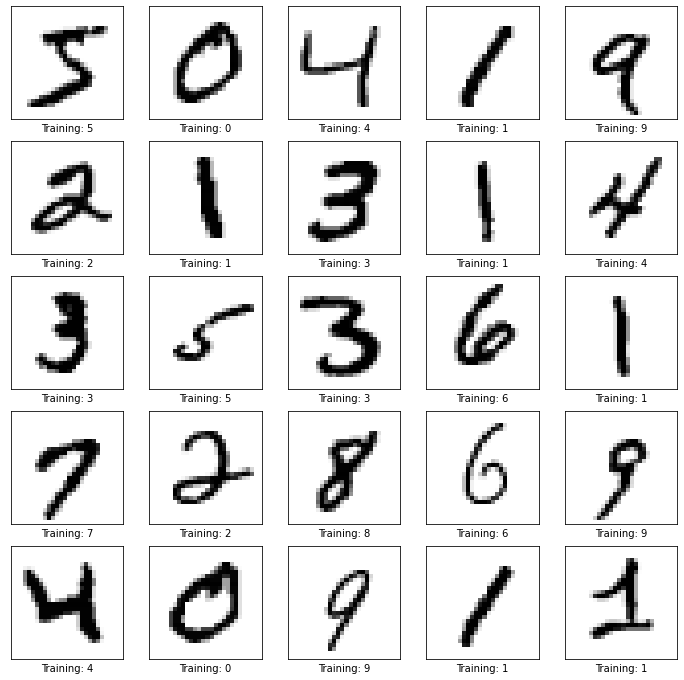

In [6]:
# If you don t have matplotib, uncomment the following:
# !conda install matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Reading 10 training examples
plt.figure(figsize=(12,12))
for index in range(25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap = 'binary')
    plt.xlabel('Training: %i' % y_train[index])
plt.show()

Image pixel values fall in the range of 0 to 255. Hence, we will scale it to range of 0 to 1.

### Display Labels

In [7]:
# Lets check the label of the first one
y_train[0]

# The previous matches with the training example above

5

In [8]:
# Lets try to look at unique value
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding

After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0. For example:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [9]:
# It is straight forward to do it in tensoflow because of a special function in keras
from tensorflow.keras.utils import to_categorical

# We will do this for both the training and test set
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [10]:
# To make sure it has worked, let s check the shape
print('y_train_encoded shape: ', y_train_encoded.shape)
print("y_test encoded shape: ", y_test_encoded.shape)

# For every class, there is a switch...Here we are trying to classifier the output

y_train_encoded shape:  (60000, 10)
y_test encoded shape:  (10000, 10)


### Display Encoded Labels

In [11]:
# This is the encoded version of the label above
y_train_encoded[0]

# This is AWESOME!!!

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Building the Neural Networks Model




## A- Preprocessing the datasets

### Step1: Unrolling N-dimensional Arrays to Vectors

In [12]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print("x_train_reshaped shape",  x_train_reshaped.shape)
print("x_test_reshaped shape",  x_test_reshaped.shape)


x_train_reshaped shape (60000, 784)
x_test_reshaped shape (10000, 784)


### Display Pixel Values

In [13]:
# See the ! value available
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Step2: Data Normalization

In [14]:
#  Normalise by the mean and the std deviation
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# Let us defined a small variable
epsilon = 1e-10 # To stabilise the division in case x_std is very small
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
# If we calculate std and mean for test set it will create some unnecessary bias. So we will use 
# the one compute from the training set
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)


### Display Normalized Pixel Values

In [15]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# B- Creating a Model

### Step1: Creating the Model

### Step 1.1: Tuning hyper-paramters 

We will tune four hyperparameters in the model:

    1. Number of units in the first dense layer
    
    2. Dropout rate in the dropout layer
    
    3. Optimizer
    
    4. Regularisation value
    

In [16]:
from tensorboard.plugins.hparams import api as hp
 
# The hyperparameters and their values to be tested    
HP_NUM_UNITS1 = hp.HParam('num_units 1', hp.Discrete([100, 128, 200]))
HP_NUM_UNITS2 = hp.HParam('num_units 2', hp.Discrete([100, 128, 200]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.6))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'RMSprop', 'Adamax']))
HP_L2 = hp.HParam('l2 regularizer', hp.RealInterval(.001, .01))

# Setting the metric
METRIC_ACCURACY = 'accuracy'

# Creating and configuring log files
with tf.summary.create_file_writer('./logs/1/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_NUM_UNITS1, HP_NUM_UNITS2, HP_DROPOUT, HP_OPTIMIZER, HP_L2],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

## Observation

In the above cell, we initialised the values of the hyerparameters that will be used to in the tuning process. Also, we set the metric of the model to Accuracy. In fact, Tensorboard works with log files that are created during the training process. Hence, we created logs for the training process that records the losses, metrics, and other measures during the training. We could then use the info in  the log files to plot some data.

## Step 1.2: Function to train and validate

In the following, I create a function to train and validate the model. Each combination of hyperparameters run for 6 epochs and the hyperparameters are stored in an hparams dictionary.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer

def train_test_model(hparams):
    # Keras sequential model with hyperparameters passed from argument
    # 02 hidden layers = 128 each and one output layer. We have 784 input features
    # softmax = probability score for various nodes
    model = Sequential([
        Dense(hparams[HP_NUM_UNITS1], kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu', input_shape = (784,)),
        Dropout(hparams[HP_DROPOUT]),
        Dense(hparams[HP_NUM_UNITS2], kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu'), 
        Dense(10, activation = 'softmax')
    ])
    
    ### Compiling the Model
    model.compile(
    optimizer = hparams[HP_OPTIMIZER], # stochastic gradient descent
    loss = 'categorical_crossentropy', # diff predic and expe output. The function to minize to have the optimal output
    metrics = ['accuracy']
    )
    
    ### Training the Model
    model.fit(x_train_norm, y_train_encoded, epochs = 6)
    
    ### Evaluating the Model
    # This is simply a comparison...there is no backpro here
    loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
    print("Test set accuracy: ", accuracy*100)
    
    # If the output is higher than the training one, bingo!
    # Else, our model has only memorised the example and the training was not successful
    return accuracy

## Step 1.3: Log an hparams summary

For each run, log an hparams summary with hyperparameters and final accuracy:

In [18]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams) # Record the values use in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step = 1)

## Step 1.4: Start runs and log them all under one parent directory

We can now try multiple experiments, training each one with a different set of hyperparameters.


In [19]:
session_num = 0
for num_units1 in HP_NUM_UNITS1.domain.values:
    for num_units2 in HP_NUM_UNITS2.domain.values:
        for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
            for l2 in (HP_L2.domain.min_value, HP_L2.domain.max_value):
                for optimizer in HP_OPTIMIZER.domain.values:
                    
                    hparams = {
                        HP_NUM_UNITS1: num_units1,
                        HP_NUM_UNITS2: num_units2,
                        HP_DROPOUT: dropout_rate,
                        HP_L2: l2,
                        HP_OPTIMIZER: optimizer
                    
                    }
                    run_name = "run-%d" % session_num
                    print('---starting trial: %s' % run_name)
                    print({h.name: hparams[h] for h in hparams})
                    run('logs/hparam_tuning' + run_name, hparams)
                    session_num += 1
        

# Summary -- 128 + nber of bias(==10)
#model.summary()

---starting trial: run-0
{'num_units 1': 100, 'num_units 2': 100, 'dropout': 0.2, 'l2 regularizer': 0.001, 'optimizer': 'Adamax'}
Epoch 1/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6129 - accuracy: 0.8878
Epoch 2/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3866 - accuracy: 0.9419
Epoch 3/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3139 - accuracy: 0.9534
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2687 - accuracy: 0.9606
Epoch 5/6
1875/1875 [==============================] - 2s 964us/step - loss: 0.2387 - accuracy: 0.9653
Epoch 6/6
313/313 [==============================] - 0s 671us/step - loss: 0.1900 - accuracy: 0.9742
Test set accuracy:  97.42000102996826
---starting trial: run-1
{'num_units 1': 100, 'num_units 2': 100, 'dropout': 0.2, 'l2 regularizer': 0.001, 'optimizer': 'RMSprop'}
Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4723 - accuracy:

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2487 - accuracy: 0.9557
Epoch 6/6
313/313 [==============================] - 0s 661us/step - loss: 0.2070 - accuracy: 0.9681
Test set accuracy:  96.81000113487244
---starting trial: run-19
{'num_units 1': 100, 'num_units 2': 128, 'dropout': 0.2, 'l2 regularizer': 0.001, 'optimizer': 'sgd'}
Epoch 1/6
1875/1875 [==============================] - 2s 965us/step - loss: 0.7694 - accuracy: 0.8526
Epoch 2/6
1875/1875 [==============================] - 2s 988us/step - loss: 0.5267 - accuracy: 0.9252
Epoch 3/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4601 - accuracy: 0.9400
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4184 - accuracy: 0.9481
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3843 - accuracy: 0.9539
Epoch 6/6
313/313 [==============================] - 0s 792us/step - loss: 0.3172 - accuracy: 0.9664
Test set accuracy:  96.640002727

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2318 - accuracy: 0.9659
Epoch 6/6
313/313 [==============================] - 0s 714us/step - loss: 0.1861 - accuracy: 0.9743
Test set accuracy:  97.43000268936157
---starting trial: run-37
{'num_units 1': 100, 'num_units 2': 200, 'dropout': 0.2, 'l2 regularizer': 0.01, 'optimizer': 'RMSprop'}
Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4759 - accuracy: 0.9129
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.9440
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2624 - accuracy: 0.9490
Epoch 4/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2550 - accuracy: 0.9506
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2487 - accuracy: 0.9522
Epoch 6/6
313/313 [==============================] - 0s 788us/step - loss: 0.1976 - accuracy: 0.9679
Test set accuracy:  96.7899978160

Epoch 1/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7626 - accuracy: 0.8321
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5239 - accuracy: 0.8881
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4723 - accuracy: 0.8984
Epoch 4/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4518 - accuracy: 0.9039
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4370 - accuracy: 0.9072
Epoch 6/6
313/313 [==============================] - 0s 734us/step - loss: 0.2888 - accuracy: 0.9560
Test set accuracy:  95.59999704360962
---starting trial: run-47
{'num_units 1': 100, 'num_units 2': 200, 'dropout': 0.6, 'l2 regularizer': 0.01, 'optimizer': 'sgd'}
Epoch 1/6
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0420 - accuracy: 0.7613
Epoch 2/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7054 - accuracy: 0.8711
Epoch 3/6
1875/1875 [======

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2649 - accuracy: 0.9656
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2328 - accuracy: 0.9684
Epoch 6/6
313/313 [==============================] - 0s 735us/step - loss: 0.1861 - accuracy: 0.9755
Test set accuracy:  97.54999876022339
---starting trial: run-65
{'num_units 1': 128, 'num_units 2': 128, 'dropout': 0.2, 'l2 regularizer': 0.001, 'optimizer': 'RMSprop'}
Epoch 1/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4871 - accuracy: 0.9158
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2866 - accuracy: 0.9479
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2561 - accuracy: 0.9511
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9533
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2435 - accuracy: 0.9538
Epoch 6/6
313/313 [=============

313/313 [==============================] - 0s 719us/step - loss: 0.2667 - accuracy: 0.9529
Test set accuracy:  95.28999924659729
---starting trial: run-74
{'num_units 1': 128, 'num_units 2': 128, 'dropout': 0.6, 'l2 regularizer': 0.001, 'optimizer': 'adam'}
Epoch 1/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7440 - accuracy: 0.8448
Epoch 2/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5024 - accuracy: 0.9004
Epoch 3/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4523 - accuracy: 0.9081
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4319 - accuracy: 0.9128
Epoch 5/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4261 - accuracy: 0.9143
Epoch 6/6
313/313 [==============================] - 0s 718us/step - loss: 0.2907 - accuracy: 0.9541
Test set accuracy:  95.41000127792358
---starting trial: run-75
{'num_units 1': 128, 'num_units 2': 128, 'dropout': 0.6, 'l2 regularizer

1875/1875 [==============================] - 3s 1ms/step - loss: 0.9303 - accuracy: 0.8123
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6115 - accuracy: 0.8967
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5095 - accuracy: 0.9168
Epoch 4/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4442 - accuracy: 0.9255
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4001 - accuracy: 0.9316
Epoch 6/6
313/313 [==============================] - 0s 753us/step - loss: 0.2615 - accuracy: 0.9643
Test set accuracy:  96.42999768257141
---starting trial: run-93
{'num_units 1': 128, 'num_units 2': 200, 'dropout': 0.6, 'l2 regularizer': 0.01, 'optimizer': 'RMSprop'}
Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7228 - accuracy: 0.8514
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4907 - accuracy: 0.8976
Epoch 3/6
1875/1875 [============

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0645 - accuracy: 0.8001
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7563 - accuracy: 0.8956
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6678 - accuracy: 0.9152
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6061 - accuracy: 0.9262
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5598 - accuracy: 0.9343
Epoch 6/6
313/313 [==============================] - 0s 845us/step - loss: 0.4280 - accuracy: 0.9632
Test set accuracy:  96.31999731063843
---starting trial: run-112
{'num_units 1': 200, 'num_units 2': 128, 'dropout': 0.2, 'l2 regularizer': 0.001, 'optimizer': 'Adamax'}
Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6834 - accuracy: 0.9101
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4166 - accuracy: 0.9550
Epoch 3/6
1875/1875 [=

Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3826 - accuracy: 0.9427
Epoch 6/6
313/313 [==============================] - 0s 879us/step - loss: 0.2608 - accuracy: 0.9694
Test set accuracy:  96.93999886512756
---starting trial: run-121
{'num_units 1': 200, 'num_units 2': 128, 'dropout': 0.6, 'l2 regularizer': 0.001, 'optimizer': 'RMSprop'}
Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7203 - accuracy: 0.8633
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4590 - accuracy: 0.9087
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4221 - accuracy: 0.9136
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4111 - accuracy: 0.9163
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4038 - accuracy: 0.9165
Epoch 6/6
313/313 [==============================] - 0s 911us/step - loss: 0.2554 - accuracy: 0.9588
Test set accuracy:  9

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5485 - accuracy: 0.9204
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3206 - accuracy: 0.9498
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9554
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9566
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9573
Epoch 6/6
313/313 [==============================] - 0s 897us/step - loss: 0.2226 - accuracy: 0.9690
Test set accuracy:  96.8999981880188
---starting trial: run-131
{'num_units 1': 200, 'num_units 2': 200, 'dropout': 0.2, 'l2 regularizer': 0.001, 'optimizer': 'sgd'}
Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9321 - accuracy: 0.8725
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6961 - accuracy: 0.9347
Epoch 3/6
1875/1875 [=====

1875/1875 [==============================] - 3s 2ms/step - loss: 0.6114 - accuracy: 0.9337
Epoch 6/6
313/313 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.9630
Test set accuracy:  96.29999995231628
---starting trial: run-140
{'num_units 1': 200, 'num_units 2': 200, 'dropout': 0.6, 'l2 regularizer': 0.01, 'optimizer': 'Adamax'}
Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9463 - accuracy: 0.8447
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6264 - accuracy: 0.9161
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5082 - accuracy: 0.9319
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4352 - accuracy: 0.9399
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3846 - accuracy: 0.9456
Epoch 6/6
313/313 [==============================] - 0s 876us/step - loss: 0.2628 - accuracy: 0.9696
Test set accuracy:  96.960002183914

In [22]:
! powershell "echo 'checking for existing tensorboard processes'"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

%tensorboard --logdir="logs/hparam_tuning" --host localhost

! echo If it has timed out in jupyter, then go to http://localhost:6006 in the browser and check


checking for existing tensorboard processes

Handles  NPM(K)    PM(K)      WS(K)     CPU(s)     Id  SI ProcessName                                                  
-------  ------    -----      -----     ------     --  -- -----------                                                  
     84       6      944       2984       0,02   8848   1 tensorboard                                                  
     84       6      964       2984       0,00  16656   1 tensorboard                                                  


cleaning tensorboard temp dir


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 12852.

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

invalid info file: 'C:\\Users\\adjanni\\AppData\\Local\\Temp\\.tensorboard-info\\pid-2744.info'
Traceback (most recent call last):
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\adjanni\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bG9ncy9ocGFyYW1fdHVuaW5nIiwiLS1ob3N0IiwibG9jYWxob3N0Il0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxVc2Vyc1xcYWRqYW5uaVxcRGVza3RvcFxcTWFjaGluZV9MZWFybmluZ19Db3Vyc2VcXFByb2plY3RzXFxJbWFnZV9jbGFzc2lmY2F0aW9uX1RGX0tlcmFzIn0=', 'db': '', 'logdir': 'logs/hparam_tuning', 'path_prefix': '', 'pid': 2744, 'port': 6006, 'start_time': 1598353094, 'version': '2.3.0'}
invalid info file: 'C:\\Users\\adjanni\\AppData\\Lo

If it has timed out in jupyter, then go to http://localhost:6006 in the browser and check


## Step 2. Choosen the optimal parameters from Tensorbord

Since Tensorboard did not start in my computer, I access to it through http://localhost:6006 . once in TB, the analysis is done manually. In Scalar, you can pass on the mouse on the "accuracy plot" to find out the run that have performed the best. In HpARAMS, you can sort the output by accuracy or see the relationship between each hyperparameters in "Parallel Coordinate view". 

After careful analysis, and epoch=1 (you can increase it to increase accuracy), the best accuracy is 96.190% [run-97] for the following parameters:

    (.) Optimizer: adam
    
    (.) l2 regularize: 0.001
    
    (.) num_units 2: 200, num_unit 1: 200
    
    (.) dropout: 0.2

In [51]:
import time

NAME = "Hyper-Tuned-Param-{}".format(int(time.time()))
logdir = 'logs/{}'.format(NAME)


model = Sequential([
    Dense(200, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001), input_shape = (784,)),
    Dropout(0.2),
    Dense(200, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

## Training the Model. To connect my training to tensorboard, I use callbacks
# Split the training set into training and validation set (0.2%)
model.fit(
   x_train_norm,
   y_train_encoded,
   validation_split=0.2,
   batch_size=32,
   epochs = 11,
   callbacks=[
   tf.keras.callbacks.TensorBoard(logdir),
    ],
)

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_466 (Dense)            (None, 200)               157000    
_________________________________________________________________
dropout_155 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_467 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_468 (Dense)            (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/11
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5846 - accuracy: 0.9160 - val_loss: 0.3486 - val_accuracy: 0.9569
Epoch 2/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3357 - accuracy: 0.951

## The results can be visualised in Tensorboard -- logs/Hyper-Tuned-Param-{}

Check careful the loss as the epoch increases! it should normally decrease.

# Model Predictions

### Predictions on Test Set

In [52]:
#Now the model is trained, we can use it for prediction
preds = model.predict(x_test_norm)
print("Shae of preds: ", preds.shape)

Shae of preds:  (10000, 10)


### Plotting the Results

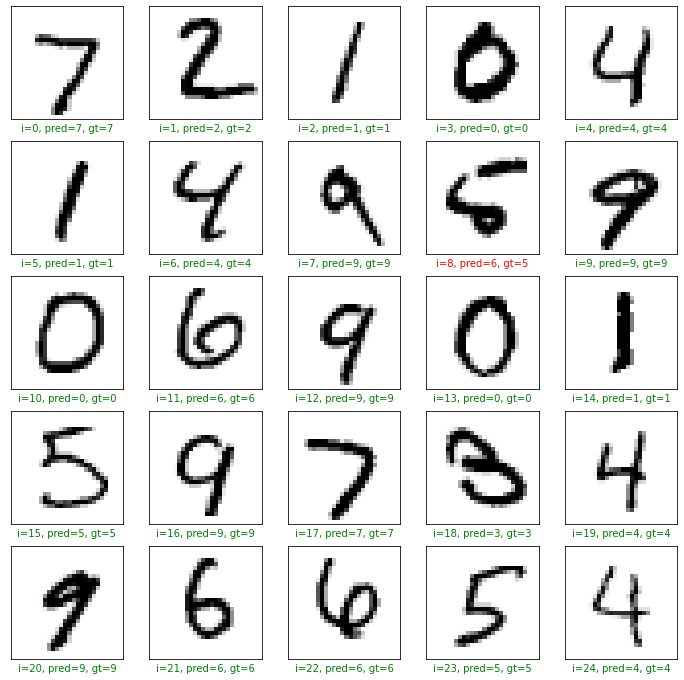

In [53]:
# Let s plot some example
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # The highest probability score is our value for prediction
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    #lET S SET THE LABEL    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color = col)
    plt.imshow(x_test[start_index+i], cmap = 'binary' )
plt.show()


#aLMOST ALL OUR PREDICTIONS ARE CORRECTED. hOWEVER, PREDICTION AT INDEX 8 IS WRONG


# Observation:

Our model predict with very good accuracy most of the numbers. However, it fails to predict accurately the nber at iteration =8. It is probably thinking that the nber is 6, WITH IS INACCURATE. iT ALSO THINK THAT IT MIGHT BE 8! AND PROBABILITY  5 with about ABOUT 40-45% of accuracy.

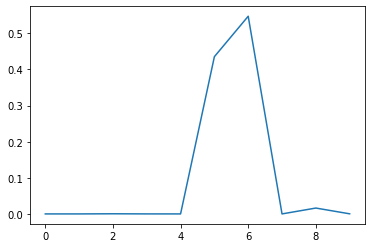

In [55]:
# lET S CHECk THE WRONG PREDICTION (SOFTMAX PROBABILITY oUTPUT)
plt.plot(preds[8])
plt.show()

# Conclusion

The model could be improved by increasing the epoch. However, the current one, with an accuracy of about 97%, is working well! 